<a href="https://colab.research.google.com/github/raulbenitez/Computer_Vision_IP/blob/main/basic_regional_properties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Segment an image


In [18]:
import matplotlib.pyplot as plt
import skimage as sk 
from skimage import io

from skimage import data
from skimage.filters import threshold_otsu
from skimage.measure import label

I = data.camera()
IG = sk.color.rgb2gray(I) # Convert RGB image to grayscale

# Apply Otsu threshold for segmentation :
thresh = threshold_otsu(IG)
bw = IG > thresh # keep lighter regions with grayscale intensities above threshold

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  # This is added back by InteractiveShellApp.init_path()


label

In [3]:
from skimage.measure import label
label_image, nregions = label(bw,return_num=True)

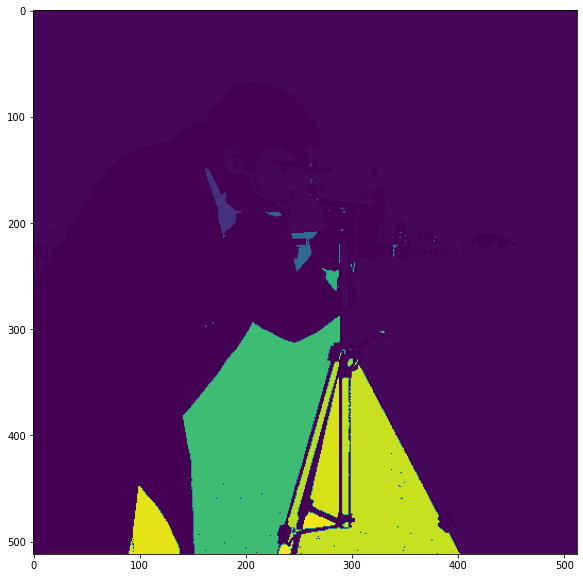

In [17]:
fig = plt.figure(figsize=(10,10))

plt.imshow(label_image)
plt.show()

Extract properties

In [4]:
from skimage.measure import regionprops
import numpy as np 

props = regionprops(label_image)

Scatterplot area vs eccentricity

In [13]:
v = np.zeros((nregions,2))
for ireg in range(0,nregions):
  v[ireg,:] = [props[ireg].area,props[ireg].eccentricity]

In [14]:
v.shape

(48, 2)

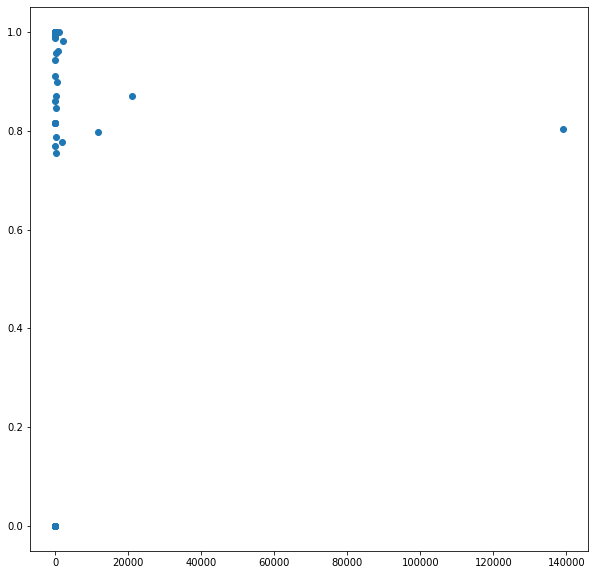

In [15]:
fig = plt.figure(figsize=(10,10))

plt.scatter(v[:,0],v[:,1])
plt.show()